In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [2]:
# Parameters
bit_count = 16
bit_rate = 1e3
sampling_rate = 1e5
carrier_frequecy = 2e3

In [3]:
T_bit = 1 / bit_rate
samples_per_bit = int(sampling_rate * T_bit)
t = np.linspace(0, bit_count * T_bit, bit_count * samples_per_bit, endpoint=False)

In [10]:
np.random.seed(0)
data_bits = np.random.choice([0, 1], size=bit_count)

In [11]:
print(data_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0]


In [12]:
bpsk_symbols = 2 * data_bits - 1

In [13]:
bpsk_waveform = np.repeat(bpsk_symbols, samples_per_bit)

In [14]:
carrier = np.cos(2 * np.pi * carrier_frequecy * t)
bpsk_signal = bpsk_waveform * carrier

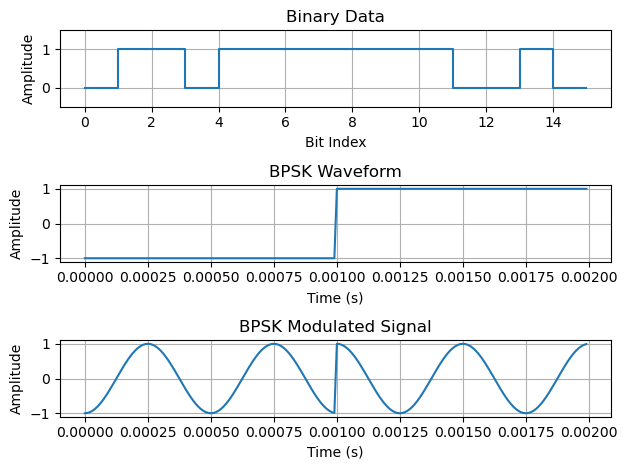

In [15]:
# Plot the binary data
plt.subplot(3, 1, 1)
plt.step(np.arange(bit_count), data_bits, where='post')
plt.title("Binary Data")
plt.xlabel("Bit Index")
plt.ylabel("Amplitude")
plt.ylim(-0.5, 1.5)
plt.grid(True)

# Plot the BPSK waveform
plt.subplot(3, 1, 2)
plt.plot(t[:200], bpsk_waveform[:200])
plt.title("BPSK Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the BPSK modulated signal
plt.subplot(3, 1, 3)
plt.plot(t[:200], bpsk_signal[:200])
plt.title("BPSK Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

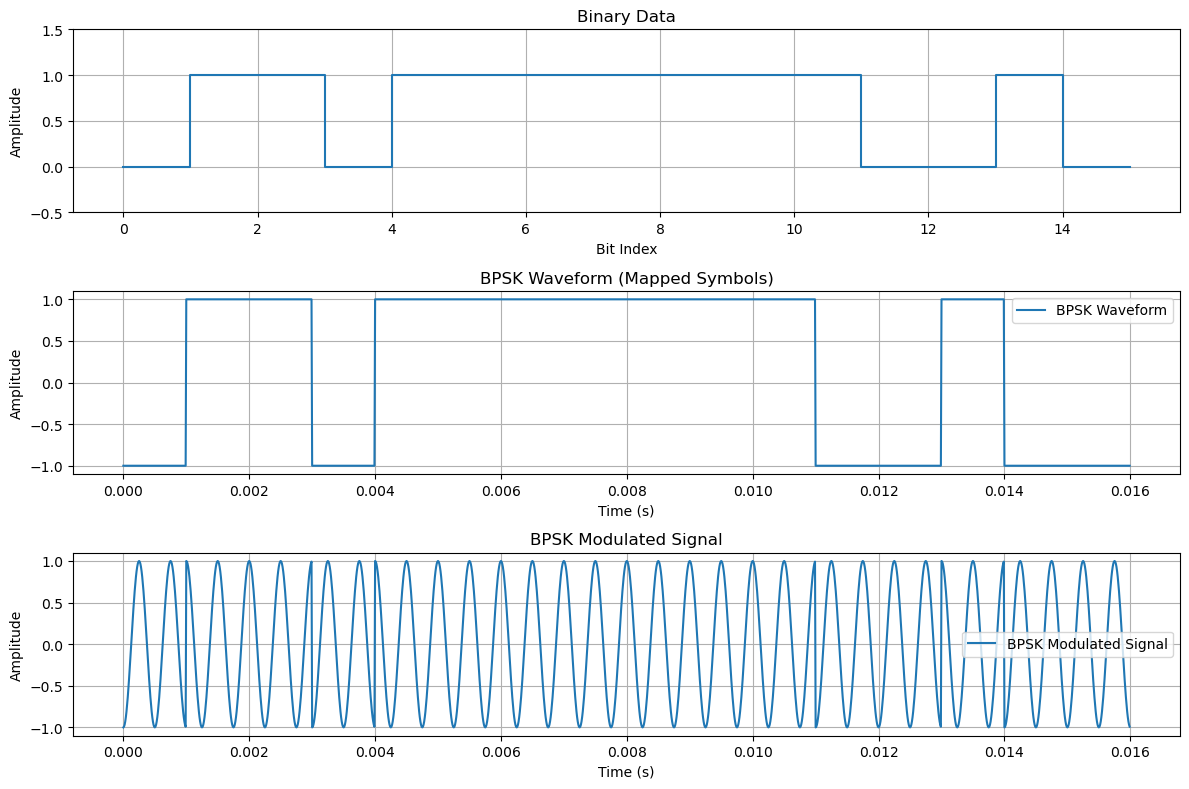

In [16]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot the binary data
plt.subplot(3, 1, 1)
plt.step(np.arange(bit_count), data_bits, where='post', label="Binary Data")
plt.title("Binary Data")
plt.xlabel("Bit Index")
plt.ylabel("Amplitude")
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.legend

# Plot the BPSK waveform
plt.subplot(3, 1, 2)
plt.plot(t, bpsk_waveform, label="BPSK Waveform")
plt.title("BPSK Waveform (Mapped Symbols)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Plot the BPSK modulated signal
plt.subplot(3, 1, 3)
plt.plot(t, bpsk_signal, label="BPSK Modulated Signal")
plt.title("BPSK Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Convolutional Encoding

In [17]:
def convolutional_encoder(input_bits, g1, g2):
    """
    Perform convolutional encoding with given generator polynomials.
    
    Parameters:
        input_bits (list): Input binary sequence.
        g1 (list): Generator polynomial 1.
        g2 (list): Generator polynomial 2.
    
    Returns:
        list: Encoded output sequence.
    """
    # Add zero padding for the constraint length
    K = len(g1)  # Constraint length
    input_padded = np.concatenate((input_bits, [0] * (K - 1)))

    # Output sequence
    encoded_sequence = []

    # Convolutional encoding
    for i in range(len(input_bits)):
        # Current window of bits
        window = input_padded[i:i+K]
        
        # Compute outputs for g1 and g2
        output_g1 = np.sum(window * g1) % 2  # XOR operation
        output_g2 = np.sum(window * g2) % 2  # XOR operation

        # Append outputs to encoded sequence
        encoded_sequence.append(output_g1)
        encoded_sequence.append(output_g2)

    return encoded_sequence

In [18]:
input_bits = [1, 0, 1]  # Example input sequence
g1 = [1, 1, 1]  # Generator polynomial 1
g2 = [1, 0, 1]  # Generator polynomial 2

In [19]:
# Perform convolutional encoding
encoded_bits = convolutional_encoder(input_bits, g1, g2)

# Print results
print("Input Bits: ", input_bits)
print("Encoded Bits: ", encoded_bits)

Input Bits:  [1, 0, 1]
Encoded Bits:  [0, 0, 1, 0, 1, 1]


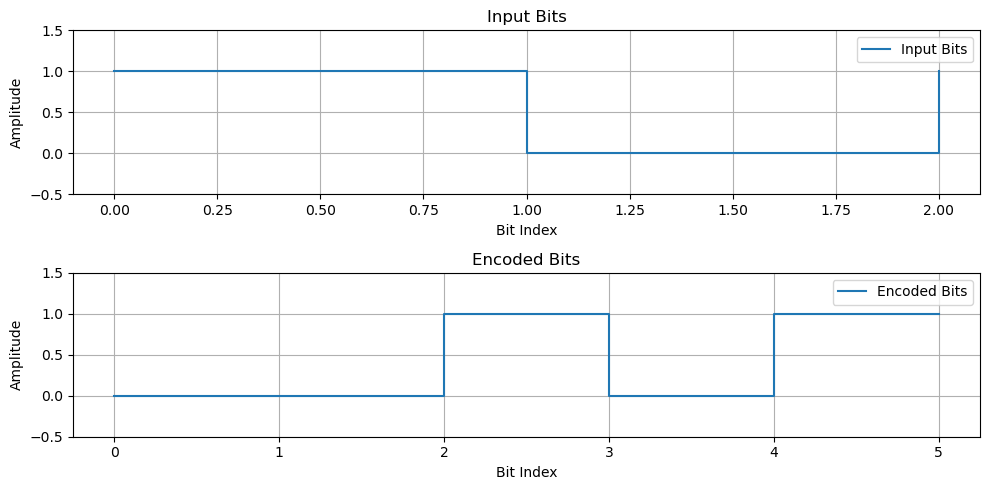

In [20]:
# Visualizing the input and encoded sequences
plt.figure(figsize=(10, 5))

# Input bits
plt.subplot(2, 1, 1)
plt.step(range(len(input_bits)), input_bits, where='post', label="Input Bits")
plt.ylim(-0.5, 1.5)
plt.title("Input Bits")
plt.grid(True)
plt.xlabel("Bit Index")
plt.ylabel("Amplitude")
plt.legend()

# Encoded bits
plt.subplot(2, 1, 2)
plt.step(range(len(encoded_bits)), encoded_bits, where='post', label="Encoded Bits")
plt.ylim(-0.5, 1.5)
plt.title("Encoded Bits")
plt.grid(True)
plt.xlabel("Bit Index")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

# Correlation

In [21]:
def generate_prn_code(length, seed=1):
    """
    Generate a pseudo-random PRN code using a Linear Feedback Shift Register (LFSR).
    Parameters:
        length (int): Length of the PRN code.
        seed (int): Initial seed for the LFSR.
    Returns:
        np.array: Generated PRN code.
    """
    np.random.seed(seed)
    return np.random.choice([1, -1], size=length)  # Random +1 or -1

In [22]:
def plot_signal(signal, title, xlabel, ylabel):
    """
    Utility function to plot a signal.
    """
    plt.figure(figsize=(10, 3))
    plt.plot(signal, label=title)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

In [29]:
# Generate PRN Code
prn_length =  1024  # Length of PRN code
prn_code = generate_prn_code(prn_length)

In [24]:
print(prn_code)

[-1 -1  1  1 -1 -1 -1 -1]


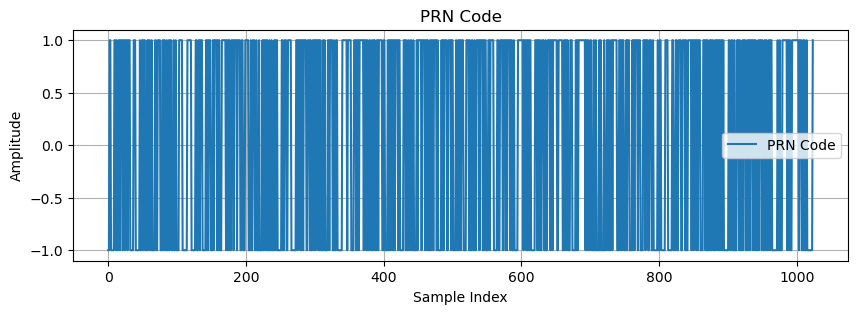

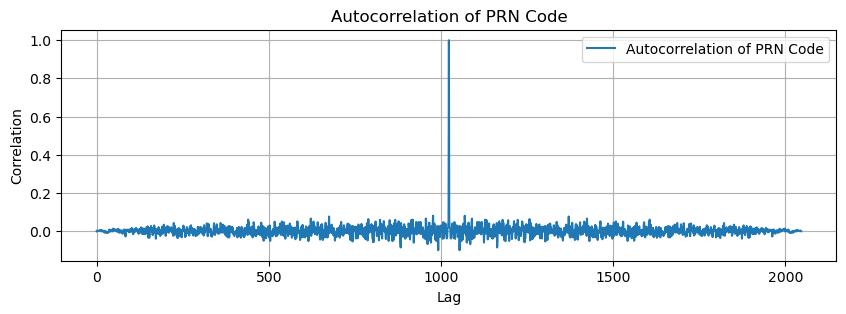

In [30]:
# Plot PRN Code
plot_signal(prn_code, "PRN Code", "Sample Index", "Amplitude")

# Compute and Plot Autocorrelation
autocorr = correlate(prn_code, prn_code, mode='full') / prn_length
lags = np.arange(-len(prn_code) + 1, len(prn_code))
plot_signal(autocorr, "Autocorrelation of PRN Code", "Lag", "Correlation")


In [31]:
# Generate PRN-modulated BPSK signal
prn_expanded = np.tile(prn_code[:samples_per_bit], bit_count)
bpsk_prn_signal = bpsk_waveform * prn_expanded

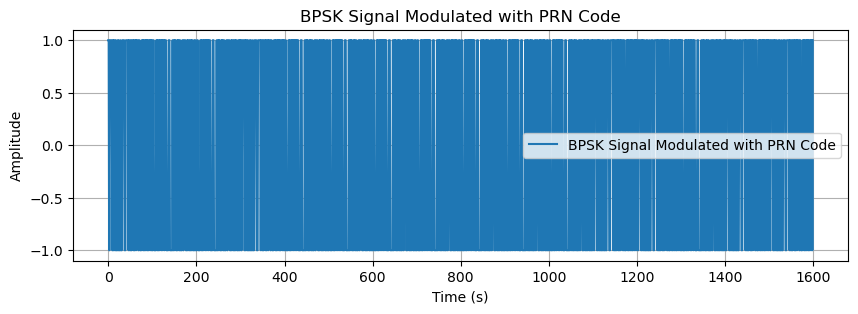

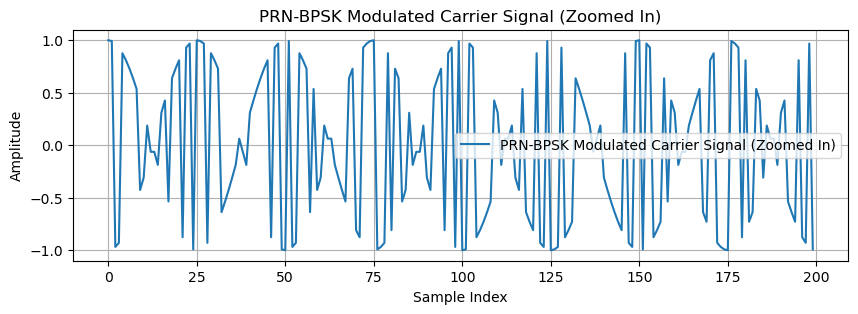

In [33]:
# Modulate with carrier
carrier = np.cos(2 * np.pi * carrier_frequecy * t)
modulated_signal = bpsk_prn_signal * carrier

# Plot BPSK signal modulated with PRN Code
plot_signal(bpsk_prn_signal, "BPSK Signal Modulated with PRN Code", "Time (s)", "Amplitude")

# Plot PRN-BPSK Modulated Carrier Signal
plot_signal(modulated_signal[:200], "PRN-BPSK Modulated Carrier Signal (Zoomed In)", "Sample Index", "Amplitude")

j